In [70]:
import h5py
from pandas import read_csv, DataFrame
from matplotlib.pyplot import plot, rcParams

from numpy import array, squeeze

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from tsfresh import extract_features
from tsfresh.feature_extraction import feature_calculators as fc

In [2]:
data_path = "/home/benoit/data/dreem_challenge/X_train/X_train.h5"
labels_path = "/home/benoit/data/dreem_challenge/y_train.csv"


d = h5py.File(data_path, 'r')
labels = read_csv(labels_path)

print(d.keys())
labels.head()

<KeysViewHDF5 ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6', 'eeg_7', 'index', 'index_absolute', 'index_window', 'pulse', 'x', 'y', 'z']>


,index,sleep_stage
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [3]:
meta_data = DataFrame()

meta_data['index'] = d['index_absolute'][()]
meta_data['subject_id'] = d['index'][()]
meta_data['window'] = d['index_window'][()]
meta_data['label'] = labels['sleep_stage']

meta_data.head()

,index,subject_id,window,label
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,0,3,0
4,4,0,4,0


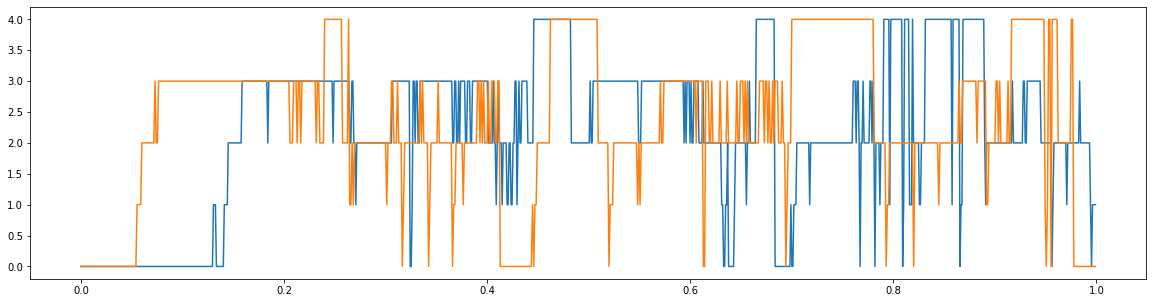

In [5]:
rcParams['figure.figsize'] = [20, 5]

subject = meta_data[meta_data['subject_id'] == 0]
# Là j'ai normalisé les intervals temporels comme ils n'ont pas la même longueur 
plot(subject['window'].values/len(subject['window'].values), subject['label'].values)
subject = meta_data[meta_data['subject_id'] == 1]
plot(subject['window'].values/len(subject['window'].values), subject['label'].values)

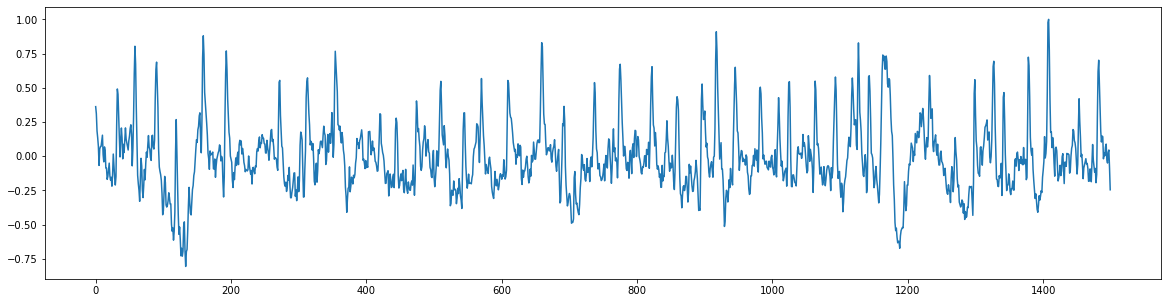

In [25]:
plot(d['eeg_1'][30]/max(abs(d['eeg_1'][30])))

Premier objectif : arriver à réduire la dimension de nos time series

In [ ]:
def extract_features(egg):
    return [fc.abs_energy(egg), fc.kurtosis(egg), fc.cid_ce(egg, True)]


l = len(d['eeg_1'])
extracted = [[] for i in range(l)]



for i in range(l):
    extracted[i] = extract_features(d['eeg_1'][i]),

extracted = squeeze(array(extracted))
    
df = DataFrame(extracted, columns=["Energy", "Kurtosis", "Complexity"])
df.head()

Modèle de prédiction sur les features sélectionnées

In [ ]:
input_features = df.values
input_labels = meta_data["label"]

X_train, X_test, y_train, y_test = train_test_split(input_features, input_labels, test_size = 0.3)

In [ ]:
clf = SVC(decision_function_shape='ovo')

clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_test)